<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/PVTexperiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title PVT experiments and simulations
#@markdown This chapter reviews the standard experiments performed by pressure/volume/temperature (PVT) laboratories on reservoir fluid
#@markdown samples: compositional analysis, multistage surface separation,
#@markdown constant composition expansion (CCE), differential liberation expansion (DLE), and constant volume depletion (CVD).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Litterature
1. [Whitson and Brule](http://www.ipt.ntnu.no/~curtis/courses/PhD-PVT/PVT-HOT-Vienna-May-2016x/e-notes/PVT-Papers/SPEPBM-Ch6.pdf)



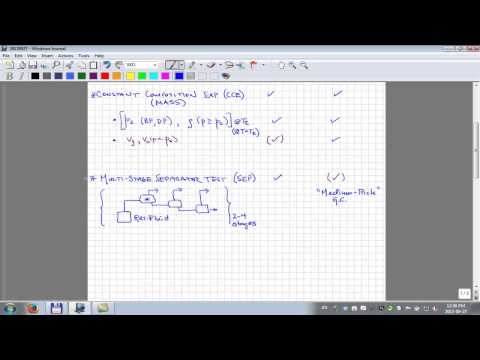

In [46]:
#@title  PVT tests 1
#@markdown An overview of the primary PVT tests used to analyze reservoir fluids.  Information from chapter 6 of "Phase Behavior" SPE Monograph (Whitson and Brule)
from IPython.display import YouTubeVideo
YouTubeVideo('KVaaw2pcS5o', width=600, height=400)

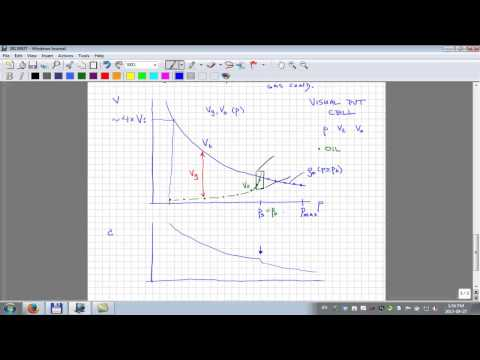

In [47]:
#@title  PVT tests 2
#@markdown An overview of the primary PVT tests used to analyze reservoir fluids.  Information from chapter 6 of "Phase Behavior" SPE Monograph (Whitson and Brule)
from IPython.display import YouTubeVideo
YouTubeVideo('MVEAI02aXmA', width=600, height=400)

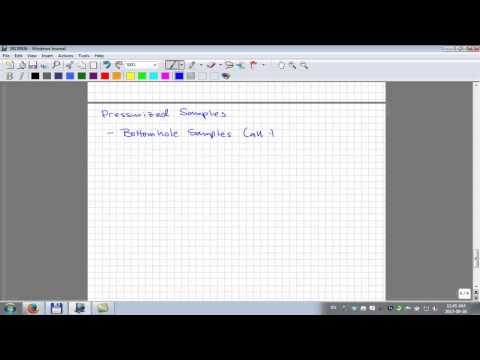

In [48]:
#@title  Sampling and PVT tests
#@markdown A lecture on sampling and the PVT laboratory tests used on reservoir fluids.  Information from chapter 6 of "Phase Behavior" SPE Monograph (Whitson and Brule)
from IPython.display import YouTubeVideo
YouTubeVideo('L2xy_nVpHok', width=600, height=400)

# Simulation of PVT experiments using NeqSim
In the following sections we will demonstrate how PVT experiments can be simulated in NeqSim using the built in methods. 

The computational implementation in Java can be seen in GIT:

https://github.com/equinor/neqsim/tree/master/src/main/java/neqsim/PVTsimulation/simulation

We will do the PVT simulations in the following steps:

1. Create the fluid
2. Run viscosity simulations
3. Differential liberation
4. Constant-volume depletion (CVD)
5. Constant mass expansion (CME)
6. GOR calculations
7. Swelling calculations




## 1. Create the fluid

We will select a pre-created fluid in neqsim, a black oil. We will the do a TPflash at standard conditions and show resulting composition, and calcualte the phase envelope of this fluid.

phase envelope for black oil
                           total          gas          oil                     
           nitrogen    1.0846E-2     2.363E-2   4.54855E-5      [mole fraction]
                CO2    2.1692E-2   4.64874E-2   7.43596E-4      [mole fraction]
            methane   2.38612E-1    5.1726E-1   3.19633E-3      [mole fraction]
             ethane   1.19306E-1   2.50389E-1   8.56108E-3      [mole fraction]
            propane   5.42299E-2   1.03527E-1   1.25815E-2      [mole fraction]
           i-butane    1.0846E-2   1.74482E-2   5.26817E-3      [mole fraction]
           n-butane   1.30152E-2   1.88211E-2   8.11005E-3      [mole fraction]
          i-pentane    1.0846E-2    1.0258E-2   1.13428E-2      [mole fraction]
          n-pentane    1.0846E-2   8.65841E-3   1.26942E-2      [mole fraction]
           n-hexane    1.0846E-2   3.50153E-3   1.70509E-2      [mole fraction]
         C10-C15_PC    2.1692E-1   1.93814E-5   4.00167E-1      [mole fraction]
         C1

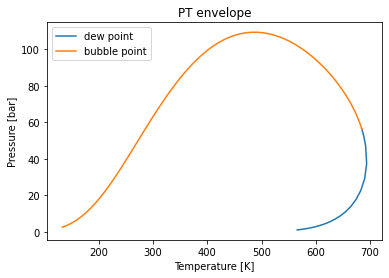

JavaObject id=o704

In [49]:
fluid1 = createfluid('black oil')
print('phase envelope for black oil')
TPflash(fluid1)
printFrame(fluid1)
phaseenvelope(fluid1, True)

## 2. Simulation of oil viscosity
The principal factors affecting viscosity are:

* Oil composition
* Temperature
* Dissolved gas
* Pressure

Viscosity increases with decreases in crude oil API gravity (assuming a constant Watson characterization factor) and decreases in temperature. The effect of solution gas is to reduce viscosity. Above saturation pressure, viscosity increases almost linearly with pressure.

<Figure size 432x288 with 0 Axes>

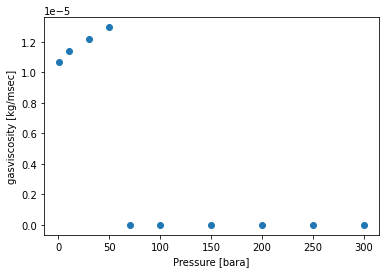

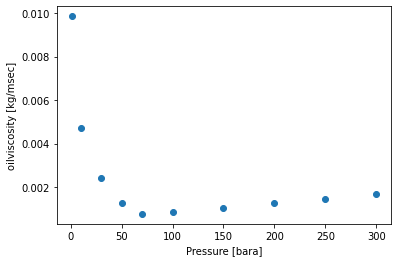

<Figure size 432x288 with 0 Axes>

In [50]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0, 1.01325]
temperature = [301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0]

gasviscosity = []
oilviscosity = []

viscositysim(fluid1,pressure,temperature,gasviscosity,oilviscosity)

plt.figure()
plt.plot(pressure, gasviscosity, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('gasviscosity [kg/msec]')
plt.figure()
plt.plot(pressure, oilviscosity, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('oilviscosity [kg/msec]')
plt.figure()

## 3. Differential liberation
In differential liberation, gas comes out of solution as pressure is gradually decreased, but is removed from the oil. When reservoir pressure drops below the bubblepoint, flash liberation dominates.

ValueError: ignored

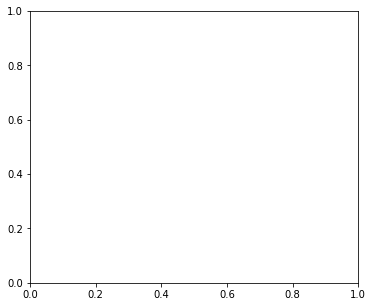

In [56]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = 301.0

Bo = []
Bg = []
relativegravity = []
Zgas =  []
gasstandardvolume = []
Rs = []
oildensity = []
relativegravity = []

difflib(fluid1,pressure,temperature,Bo, Bg,relativegravity,Zgas,gasstandardvolume,Rs, oildensity, relativegravity)


plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, Bo, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Bo [m3/Sm3]')
plt.subplot(132)
plt.plot(pressure, Rs, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Rs [m3/Sm3]')
plt.subplot(133)
plt.plot(pressure, oildensity, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('oil density [kg/m3]')
plt.show()

## 4. Constant-volume depletion (CVD)
Constant-volume depletion (CVD) experiments are performed on gas condensates and volatile oils to simulate reservoir depletion performance and compositional variation. ... The temperature of the PVT cell is maintained at the reservoir temperature T throughout the experiment.

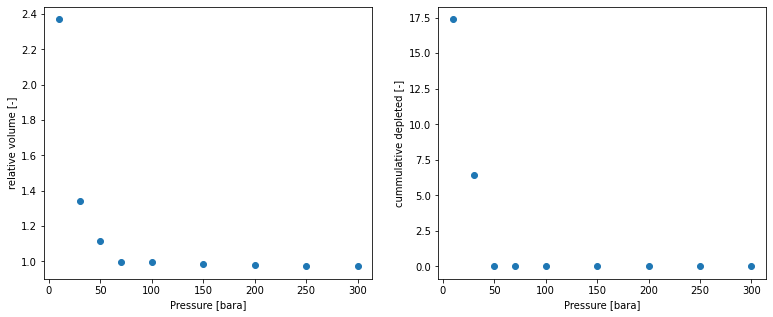

In [52]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = 301.0

relativevolume = []
liquidrelativevolume = []
Zgas =  []
Zmix = []
cummulativemolepercdepleted = []

CVD(fluid1,pressure,temperature,relativevolume, liquidrelativevolume,Zgas,Zmix,cummulativemolepercdepleted)
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, relativevolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('relative volume [-]')
plt.subplot(132)
plt.plot(pressure, cummulativemolepercdepleted, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('cummulative depleted [-]')
plt.show()


## 5. Constant mass expansion (CME)
The bubble point pressure is determined by an experiment called Constant Composition Expansion (CCE). It's also called Constant Mass Expansion (CME) experiment or Pressure-Volume (PV) relationship. ... The cell pressure is controlled by a positive displacement pump and recorded on an accurate pressure gauge.

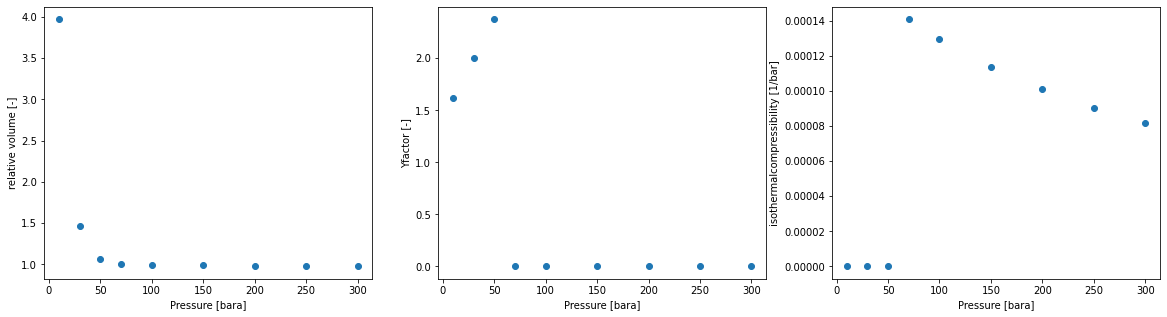

In [53]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0]
temperature = [301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0]

relativevolume = []
liquidrelativevolume = []
Zgas =  []
Yfactor = []
isothermalcompressibility = []

CME(fluid1,pressure,temperature,relativevolume, liquidrelativevolume,Zgas,Yfactor,isothermalcompressibility)

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, relativevolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('relative volume [-]')
plt.subplot(132)
plt.plot(pressure, Yfactor, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Yfactor [-]')
plt.subplot(133)
plt.plot(pressure, isothermalcompressibility, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('isothermalcompressibility [1/bar]')
plt.show()

## 6. Gas Oil Ratio
.....

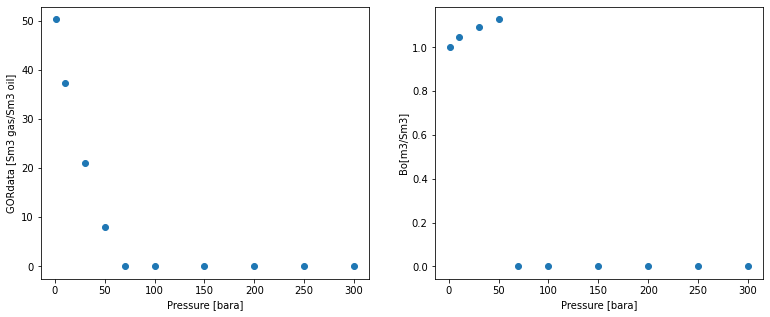

In [54]:
fluid1 = createfluid('black oil')
pressure = [300.0, 250.0, 200.0, 150.0, 100.0, 70.0, 50.0, 30.0, 10.0, 1.01325]
temperature = [301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0, 301.0]

GORdata = []
Bo = []
GOR(fluid1, pressure, temperature, GORdata, Bo)

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, GORdata, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('GORdata [Sm3 gas/Sm3 oil]')
plt.subplot(132)
plt.plot(pressure, Bo, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Bo[m3/Sm3]')
plt.show()

## 7. Swelling test
A swelling/extraction test is a common phase behavior experiment to determine reservoir fluid volume and composition changes due to CO2 dissolution at reservoir temperature. The test is usually conducted in a constant volume, high pressure view cell initially filled with a predetermined amount of stock-tank oil.

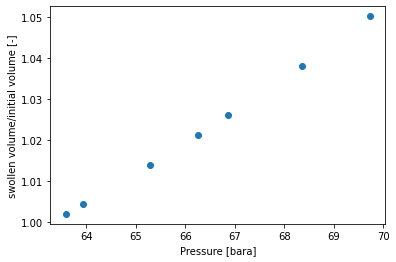

In [55]:
fluid1 = createfluid('black oil')
injectiongas = createfluid('CO2')
relativeoilvolume = []
pressure = []
fluid1.setPressure(100.0)
TPflash(fluid1)
temperature = 301.0
molPercentInjected = [0.0, 1.0, 5.0, 8.0, 10.0, 15.0, 20.0]
swellingtest(fluid1,injectiongas,temperature, molPercentInjected, pressure,relativeoilvolume)

plt.figure()
plt.plot(pressure, relativeoilvolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('swollen volume/initial volume [-]')
plt.show()